In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Data

In [3]:
pumpkin_left=plt.imread("./Data/pumpkin_left.jpg")
pumpkin_right=plt.imread("./Data/pumpkin_right.jpg")

PLeft=np.array([
    [1325.00000000, 0.00000000, 805.00000000, 0.00000000],
    [0.00000000, 1325.00000000, 468.00000000, 0.00000000],
    [0.00000000, 0.00000000, 1.00000000, 0.00000000]
])

PRight=np.array([
    [1126.67010454, -249.71530121, 1035.32929249, -1347.97882937],
    [150.95878897, 1299.48285727, 513.03484063, -381.74973338],
    [-0.18907694, -0.00556371, 0.98194651, -0.09044673]
])

verifiedLeft=np.loadtxt("./Data/PointsLeft")
verifiedRight=np.loadtxt("./Data/PointsRight")

verifiedLeft.shape

(1788, 2)

### Plotting measured points on the images

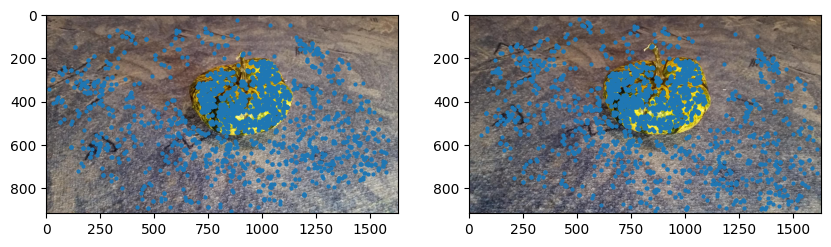

In [4]:

fig,axs=plt.subplots(1,2,figsize=(10,4))
axs[0].imshow(pumpkin_left)
axs[0].plot(verifiedLeft[:,0],verifiedLeft[:,1],'o',markersize=2)

axs[1].imshow(pumpkin_right)
axs[1].plot(verifiedRight[:,0],verifiedRight[:,1],'o',markersize=2)


### Creating the linear system to solve

In [5]:

"""
From the camera matrices creates a class that can reconstruct the 
3D points.
"""
class Reconstruct3D:
    def __init__(self,PLeft:np.array,PRight:np.array):
        self.p1L=PLeft[0]
        self.p2L=PLeft[1]
        self.p3L=PLeft[2]

        self.p1R=PRight[0]
        self.p2R=PRight[1]
        self.p3R=PRight[2]
  

    """
    Reconstructs the 3D points given the measured 2D points on the image on the left 
    and the right camera.
    """
    def get3DPoints(self,imgPointsLeft:np.array,imgPointsRight:np.array)->np.array:
        points3D=np.zeros((imgPointsLeft.shape[0],3))
        for c,(pointLeft,pointRight) in enumerate(zip(imgPointsLeft,imgPointsRight)):
            coeff_matrix=np.array([
                pointLeft[0]*self.p3L-self.p1L,
                pointLeft[1]*self.p3L-self.p2L,
                pointRight[0]*self.p3R-self.p1R,
                pointRight[1]*self.p3R-self.p2R
            ])
            U,S,V=np.linalg.svd(coeff_matrix)
            points3D[c]+=V[:,0][:3]/V[:,0][-1]
        return points3D

In [6]:
reconstructor=Reconstruct3D(PLeft,PRight)
reconstructedHomogeneousPoints=reconstructor.get3DPoints(verifiedLeft,verifiedRight)


In [7]:
reconstructedHomogeneousPoints

array([[-15.54668761,  -0.8700065 ,  -9.23960244],
       [ -2.45866479,   1.01640644,   1.72690551],
       [  2.84639244,   0.49950859,  -1.45431786],
       ...,
       [ -5.83431944,  -0.3050191 ,  -3.35544989],
       [-32.21878144,  -3.09076405, -21.61700636],
       [-19.58195608,  -2.15662453, -12.60734351]])

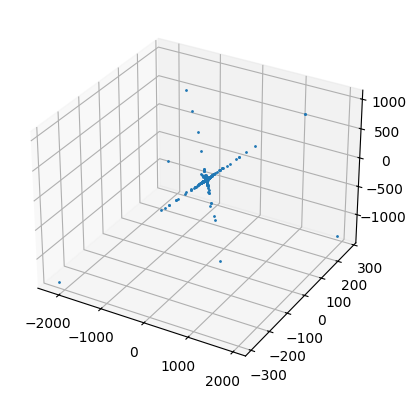

In [8]:
fig=plt.figure()
axs=plt.axes(projection="3d")
x=reconstructedHomogeneousPoints[:,0]
y=reconstructedHomogeneousPoints[:,1]
z=reconstructedHomogeneousPoints[:,2]
axs.plot3D(x,y,z,'o',markersize=1)
plt.show()